# Imports

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./advertising.csv')

# Exploratory Data Analysis

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': cutomer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
data.dtypes.value_counts()

,count
object,4
float64,3
int64,3


In [5]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [7]:
object_data = ['Ad Topic Line', 'City', 'Country', 'Timestamp']

In [8]:
len(data[object_data[0]].value_counts())
# to check how many differences under the topics column
# there is 1000 topics.

1000

In [9]:
len(data[object_data[1]].value_counts())
# to check how many differences under the City column
# there is 969 cities.

969

In [10]:
len(data[object_data[2]].value_counts())
# to check how many differences under the Country column
# there is 237 countries.
# Note: Maybe we can use this as mean labeling, we can drop the
# 'Ad Topic Line', 'City', and 'Timestamp'

237

array([[<Axes: title={'center': 'Daily Time Spent on Site'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Area Income'}>,
        <Axes: title={'center': 'Daily Internet Usage'}>],
       [<Axes: title={'center': 'Male'}>,
        <Axes: title={'center': 'Clicked on Ad'}>]], dtype=object)

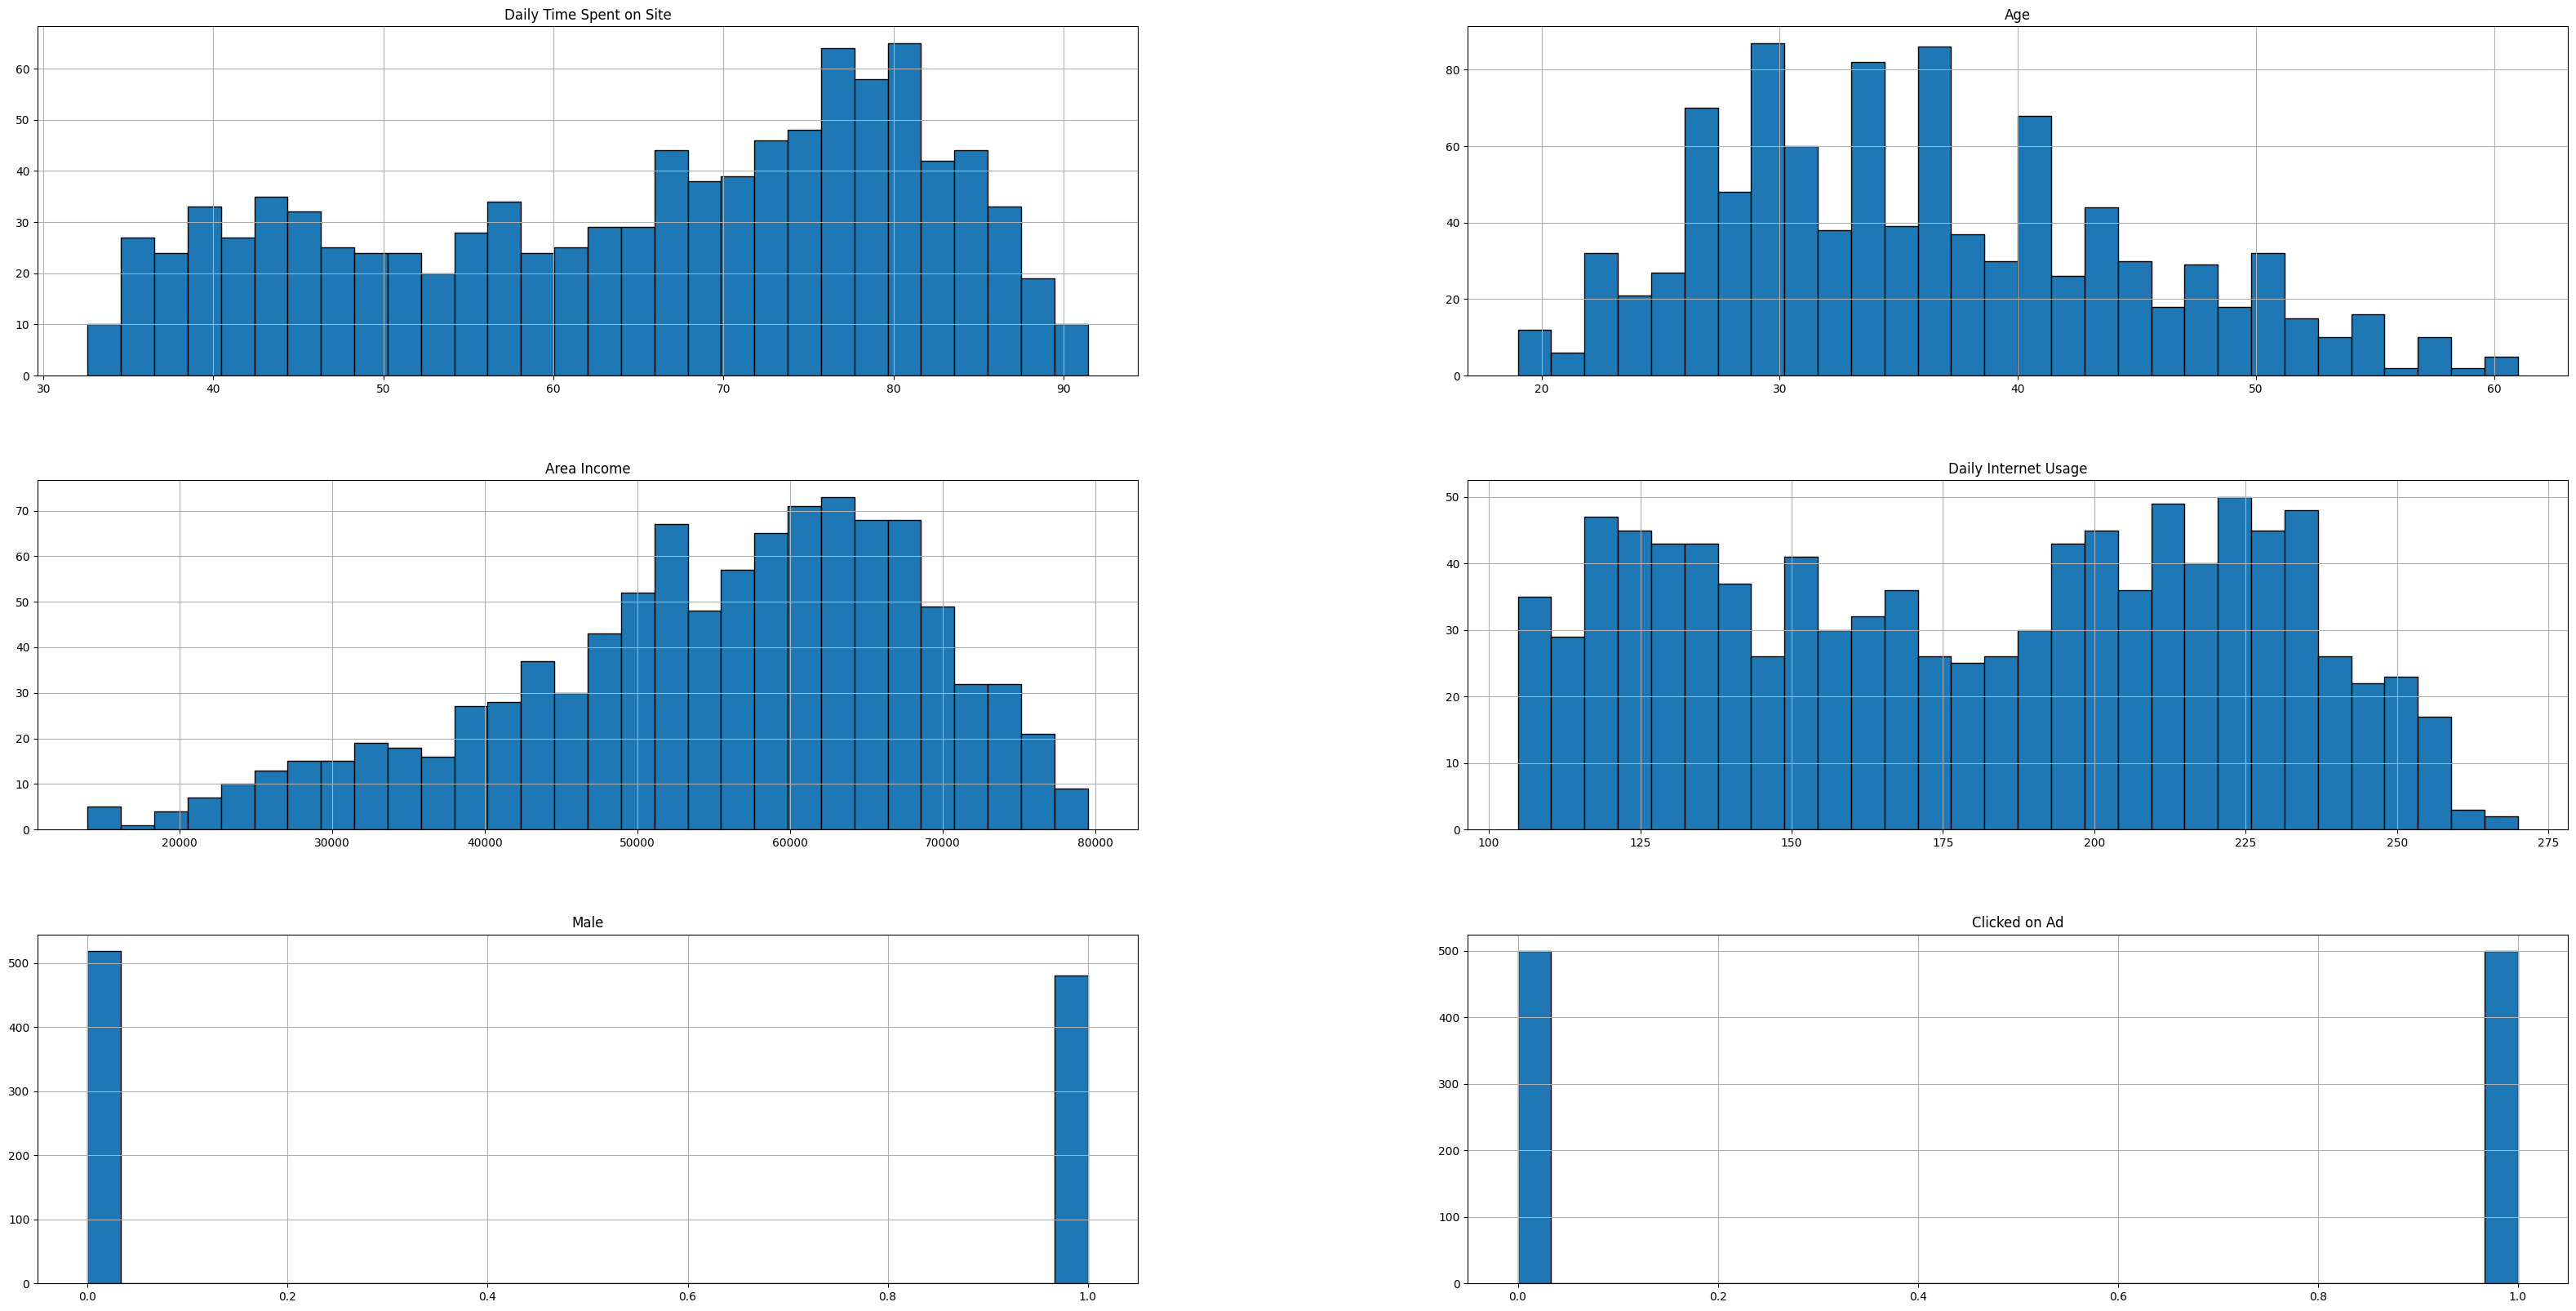

In [11]:
df_plot = data.drop(object_data, axis=1)

df_plot.hist(figsize=(40, 20), bins=30, edgecolor="black")

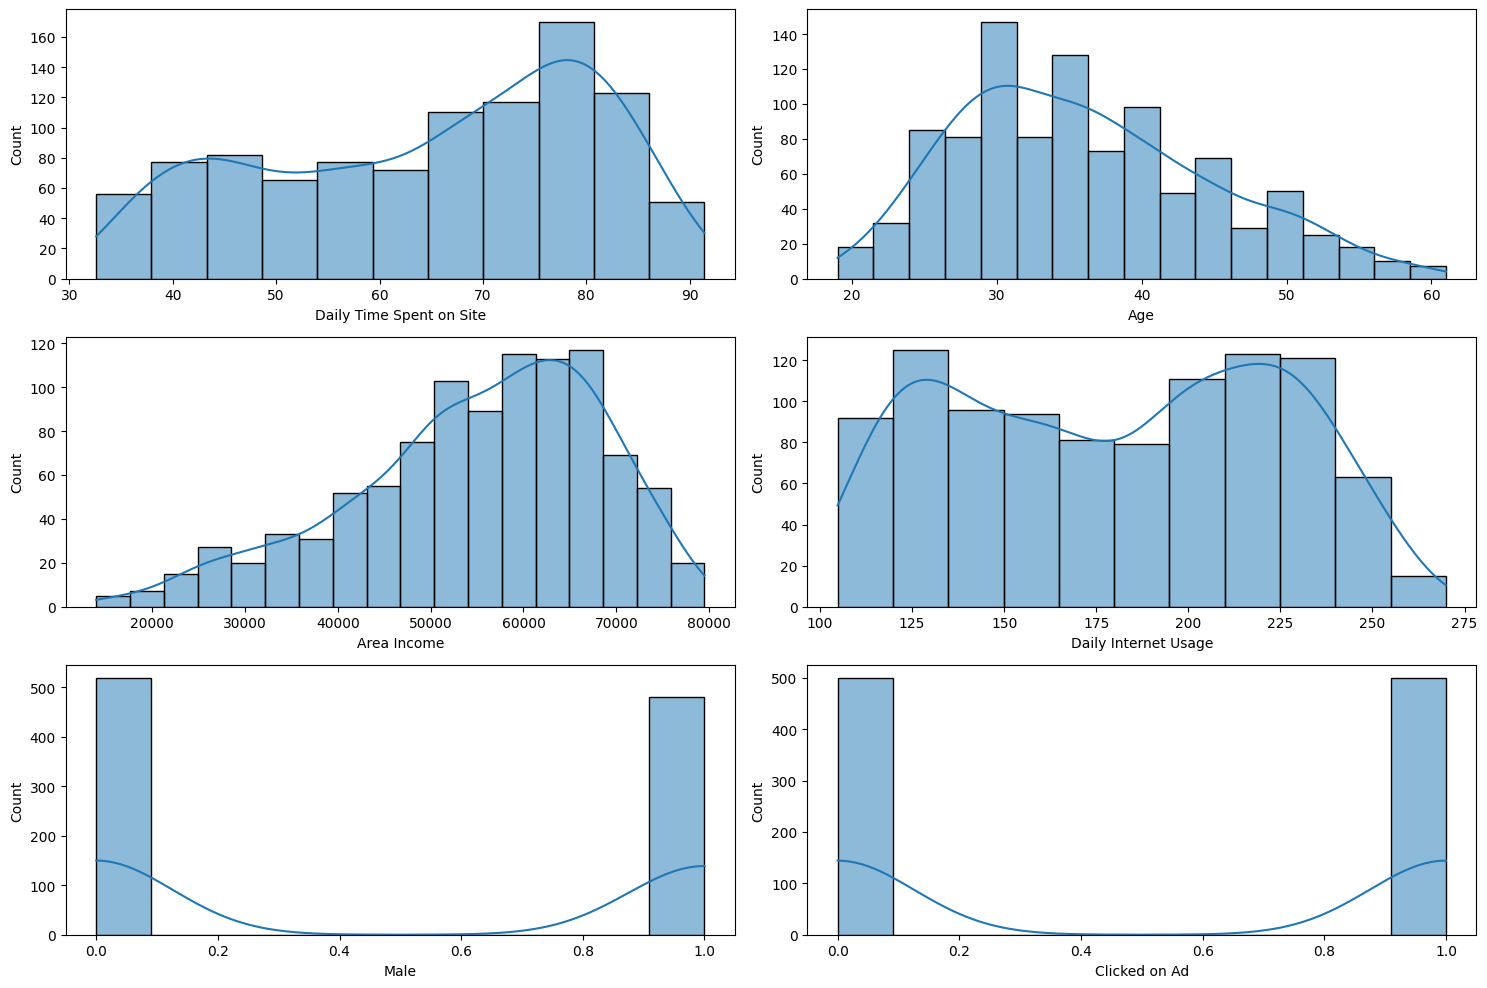

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10)) # Create a figure and several axes
axes = axes.flatten() # Turn a 2D array into a 1D array for simplification

for i, col in enumerate(df_plot.columns):
  # Create a histogram for all columns
  sns.histplot(data=df_plot, x=col, kde=True, ax=axes[i])
plt.tight_layout()
plt.show()

# Note: for feature Male and Clicked on Ad is a categorical dataset bar plot more suitable for ploting

In [13]:
# df_plot['Male'].value_counts()[1]

In [14]:
male = pd.DataFrame(np.array([[0, df_plot['Male'].value_counts()[0]], [1, df_plot['Male'].value_counts()[1]]]), columns=['cat', 'num'])
click = pd.DataFrame(np.array([[0, df_plot['Clicked on Ad'].value_counts()[0]], [1, df_plot['Clicked on Ad'].value_counts()[1]]]), columns=['cat', 'num'])

In [15]:
# male
click

,cat,num
0,0,500
1,1,500


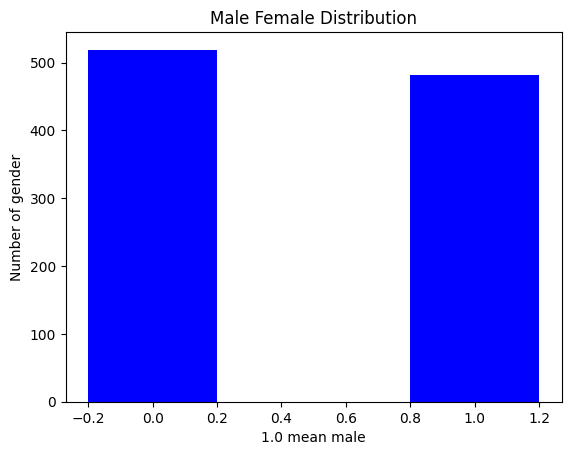

In [16]:
plt.bar(male.cat, male.num, color ='blue',
        width = 0.4)

plt.xlabel("1.0 mean male")
plt.ylabel("Number of gender")
plt.title("Male Female Distribution")
plt.show()

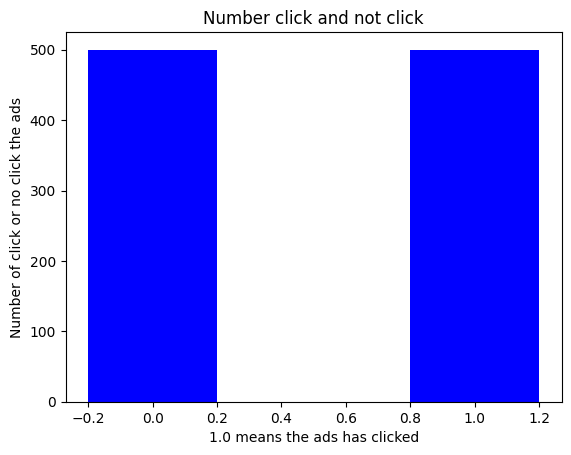

In [17]:
plt.bar(click.cat, click.num, color ='blue',
        width = 0.4)

plt.xlabel("1.0 means the ads has clicked")
plt.ylabel("Number of click or no click the ads")
plt.title("Number click and not click")
plt.show()

<Axes: >

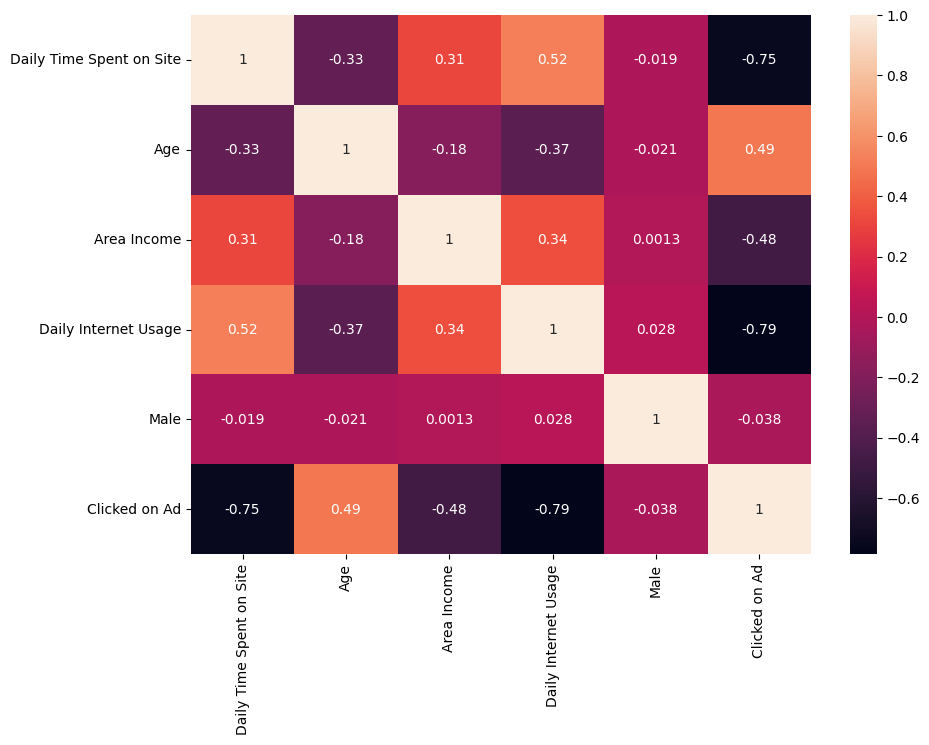

In [18]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_plot.corr(), annot=True)

# Feature Engineering

#### Check Duplicates

In [19]:
len(data)

1000

In [20]:
len(data.drop_duplicates())
#Note: there is no duplicate on the dataset

1000

#### Check Outliers

In [21]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

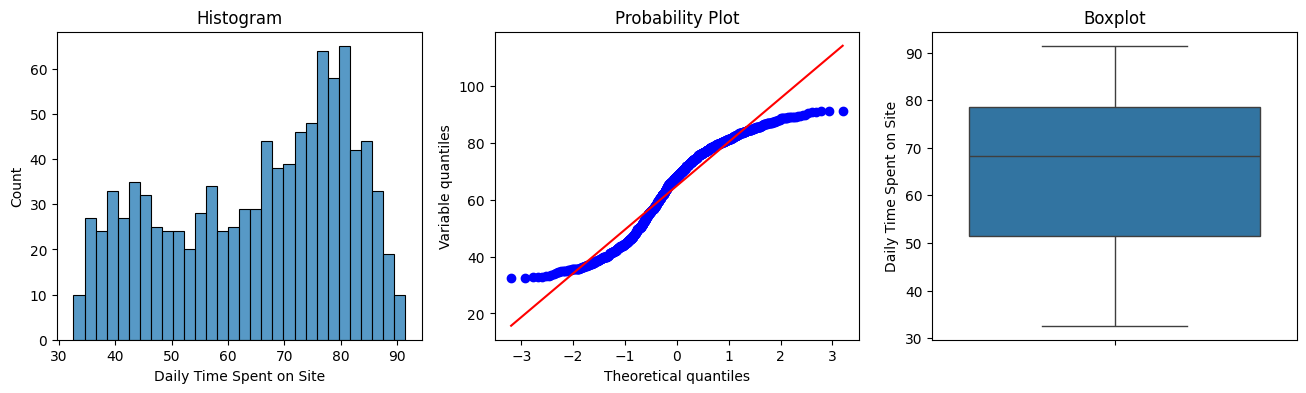

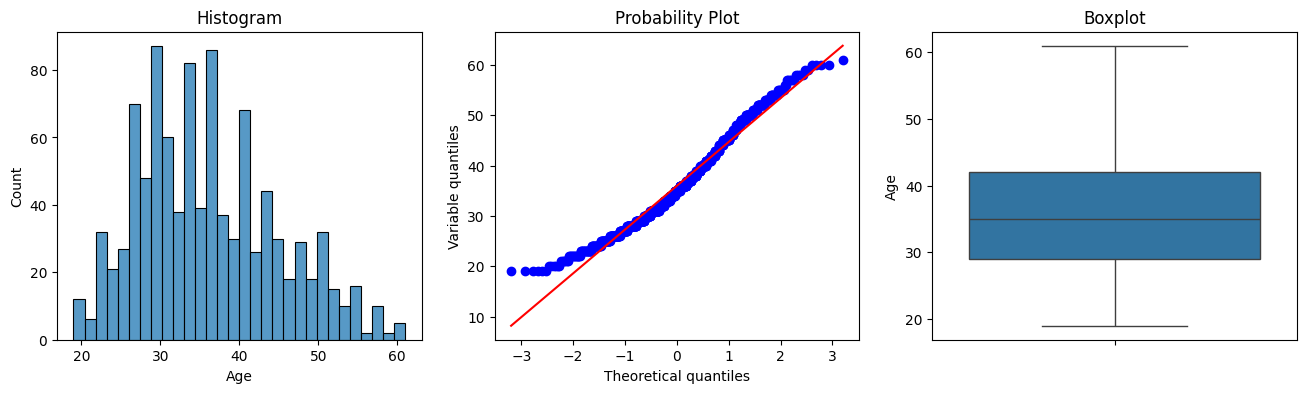

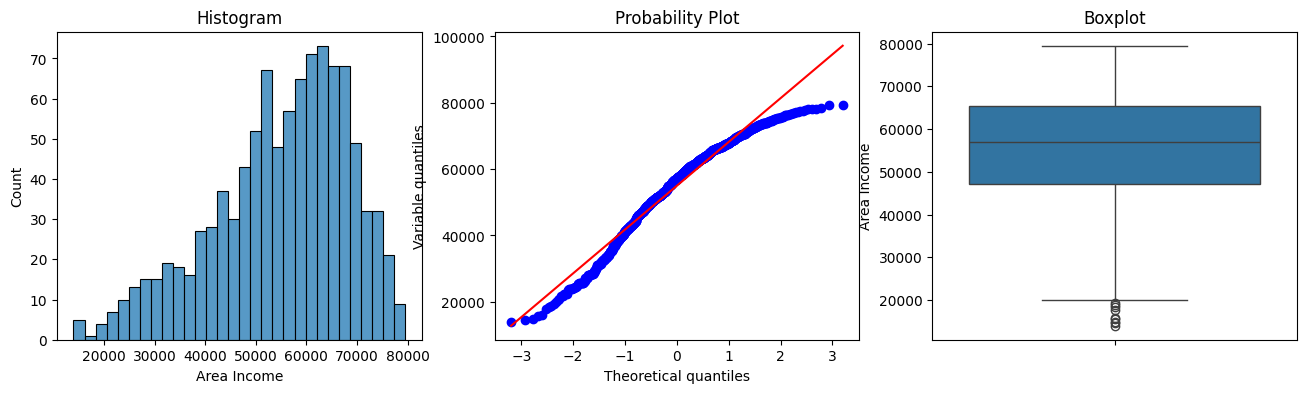

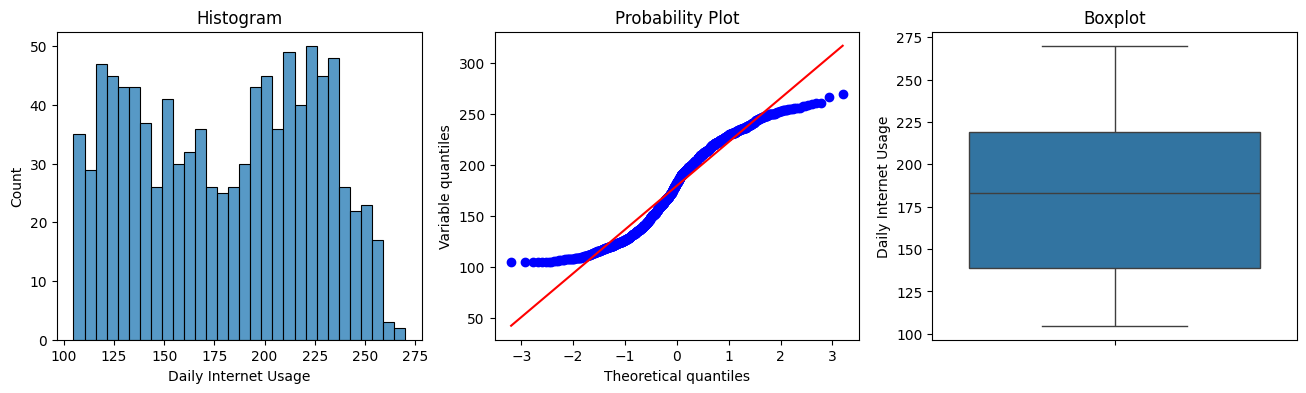

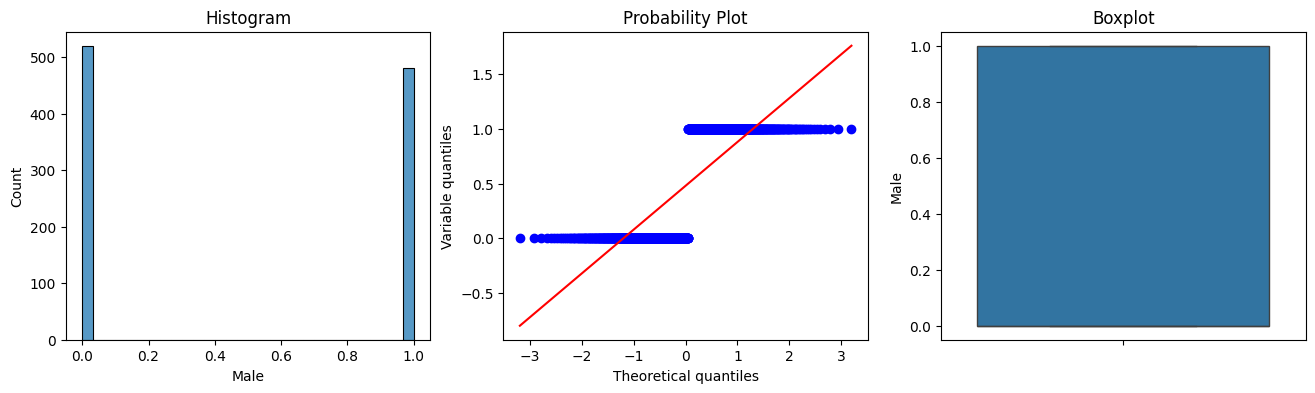

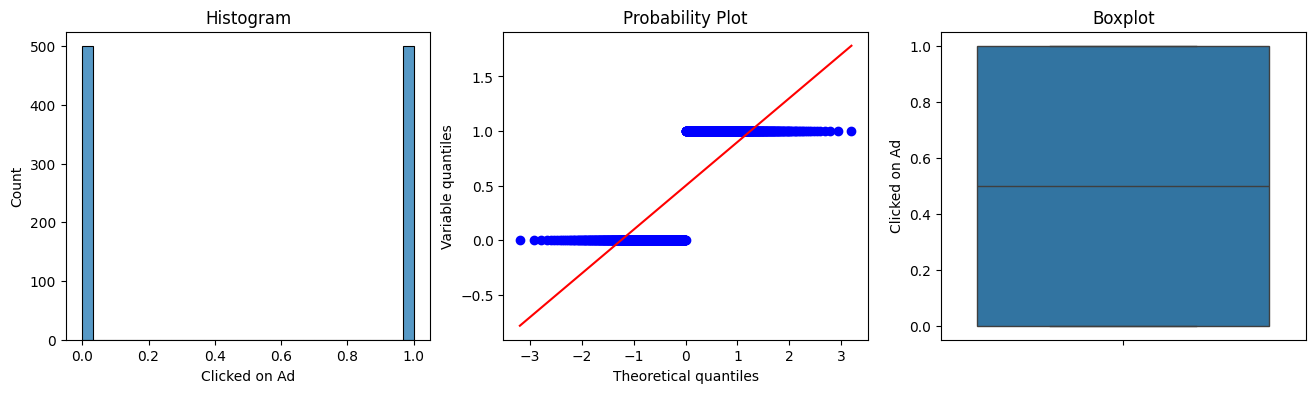

In [22]:
for n in range(6):
    check_plot(df_plot, df_plot.columns[n])
# Note: we can see that the area income

In [23]:
train_cls, test_cls = train_test_split(data, test_size = 0.2, random_state=42)

#### using IQR for outlier handling

In [24]:
def find_outlier_boundary(df, variable):

    # Mencari batas atas dan batas bawah

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [25]:
Population_upper_limit, Population_lower_limit = find_outlier_boundary(train_cls, 'Area Income')
Population_upper_limit, Population_lower_limit

(91926.765, 20608.384999999995)

In [26]:
train_cls['Area Income']= np.where(train_cls['Area Income'] > Population_upper_limit, Population_upper_limit,
                       np.where(train_cls['Area Income'] < Population_lower_limit, Population_lower_limit, train_cls['Area Income']))

In [27]:
Population_upper_limit, Population_lower_limit = find_outlier_boundary(test_cls, 'Area Income')
Population_upper_limit, Population_lower_limit

(96496.24874999998, 14915.278750000012)

In [28]:
test_cls['Area Income']= np.where(test_cls['Area Income'] > Population_upper_limit, Population_upper_limit,
                       np.where(test_cls['Area Income'] < Population_lower_limit, Population_lower_limit, test_cls['Area Income']))

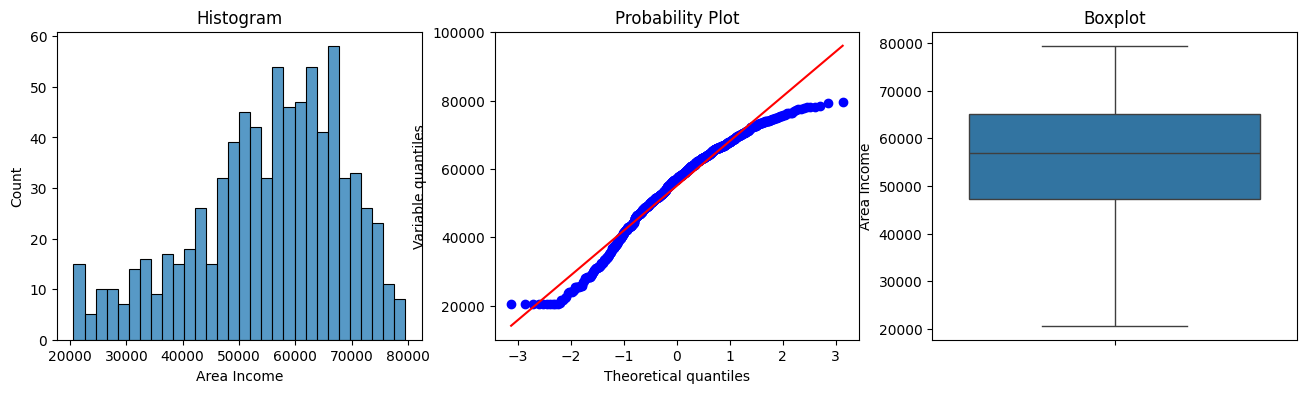

In [29]:
check_plot(train_cls, 'Area Income')

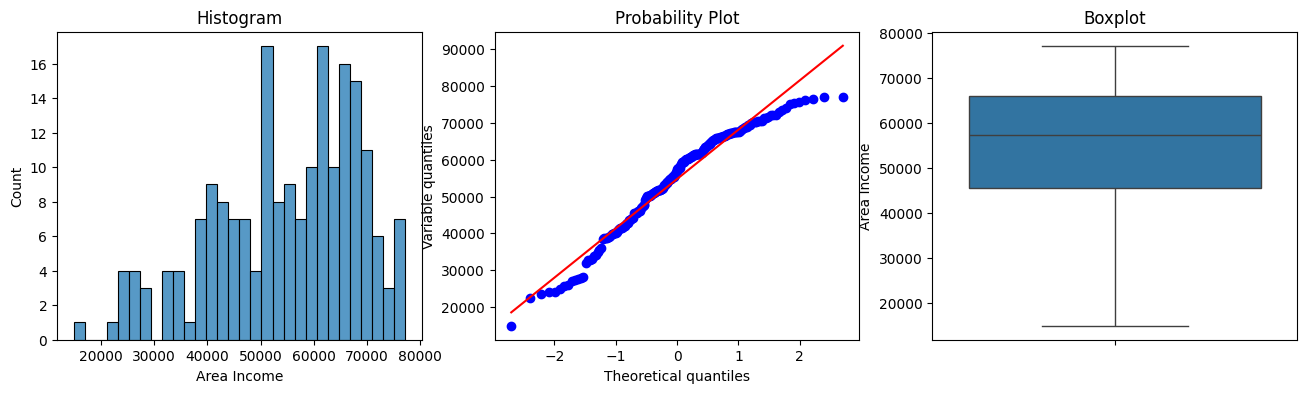

In [30]:
check_plot(test_cls, 'Area Income')

#### Check Missing Value

In [31]:
train_cls.isna().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Male,0
Country,0
Timestamp,0
Clicked on Ad,0


In [32]:
test_cls.isna().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Male,0
Country,0
Timestamp,0
Clicked on Ad,0


#### Mean Encoding

In [33]:
dict_contract = train_cls.groupby(['Country'])['Clicked on Ad'].mean().to_dict()
dict_contract
# it seem there is similar result between countries like 'Montenegro', 'Niger' and 'Montserrat'

{'Afghanistan': 0.625,
 'Albania': 0.5,
 'Algeria': 0.75,
 'American Samoa': 0.75,
 'Andorra': 1.0,
 'Angola': 0.0,
 'Anguilla': 0.5,
 'Antarctica (the territory South of 60 deg S)': 1.0,
 'Antigua and Barbuda': 0.8,
 'Argentina': 0.5,
 'Armenia': 0.3333333333333333,
 'Aruba': 0.0,
 'Australia': 1.0,
 'Austria': 0.0,
 'Azerbaijan': 0.3333333333333333,
 'Bahamas': 0.5714285714285714,
 'Bahrain': 0.5,
 'Bangladesh': 0.5,
 'Barbados': 0.4,
 'Belarus': 0.5,
 'Belgium': 0.25,
 'Belize': 0.6,
 'Benin': 0.5,
 'Bermuda': 0.0,
 'Bhutan': 0.5,
 'Bolivia': 0.0,
 'Bosnia and Herzegovina': 0.3333333333333333,
 'Bouvet Island (Bouvetoya)': 0.25,
 'Brazil': 0.6666666666666666,
 'British Indian Ocean Territory (Chagos Archipelago)': 1.0,
 'British Virgin Islands': 0.3333333333333333,
 'Brunei Darussalam': 0.25,
 'Bulgaria': 0.8,
 'Burkina Faso': 0.3333333333333333,
 'Burundi': 0.2,
 'Cambodia': 0.3333333333333333,
 'Cameroon': 0.0,
 'Canada': 0.6,
 'Cape Verde': 0.0,
 'Cayman Islands': 0.6,
 'Chad': 0

In [34]:
dict_contract = train_cls.groupby(['Country'])['Clicked on Ad'].mean().to_dict()
train_cls['Country'] = train_cls['Country'].map(dict_contract)

In [35]:
dict_contract = test_cls.groupby(['Country'])['Clicked on Ad'].mean().to_dict()
test_cls['Country'] = test_cls['Country'].map(dict_contract)

In [36]:
train_cls.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
29,76.02,22,46179.97,209.82,Business-focused value-added definition,West Guybury,0,0.250000,2016-01-27 12:38:16,0
535,78.76,32,70012.83,208.02,Managed attitude-oriented Internet solution,East Valerie,1,0.333333,2016-04-20 10:04:29,0
695,73.49,38,67132.46,244.23,Organic 3rdgeneration encryption,Mosleyburgh,0,0.166667,2016-02-14 11:36:08,0
557,79.67,28,58576.12,226.79,Total grid-enabled application,Charlesbury,0,0.500000,2016-07-20 01:56:33,0
836,49.21,46,49206.40,115.60,Realigned 24/7 core,Carterland,0,0.800000,2016-02-28 03:34:35,1


In [37]:
test_cls.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
521,63.26,29,54787.37,120.46,Customizable holistic archive,East Donna,1,1.0,2016-03-02 04:02:45,1
737,71.23,52,41521.28,122.59,Self-enabling zero administration neural-net,Ericksonmouth,0,0.5,2016-01-05 11:53:17,1
740,43.63,38,61757.12,135.25,Quality-focused maximized extranet,Frankport,1,0.5,2016-05-25 19:45:16,1
660,42.04,49,67323.00,182.11,Organic logistical adapter,New Christinatown,0,1.0,2016-02-03 16:54:33,1
411,78.68,29,66225.72,208.05,Inverse high-level capability,Leonchester,0,0.5,2016-01-16 16:40:30,0


In [38]:
# train_cls = train_cls.drop(['Ad Topic Line','City','Timestamp', 'Country'], axis=1)
train_cls = train_cls.drop(['Ad Topic Line','City','Timestamp'], axis=1)

In [39]:
# test_cls = test_cls.drop(['Ad Topic Line','City','Timestamp', 'Country'], axis=1)
test_cls = test_cls.drop(['Ad Topic Line','City','Timestamp'], axis=1)

In [40]:
print('train shape:', train_cls.shape)
print('test shape:', test_cls.shape)

train shape: (800, 7)
test shape: (200, 7)


# Model Training

In [41]:
train_cls.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Clicked on Ad
29,76.02,22,46179.97,209.82,0,0.250000,0
535,78.76,32,70012.83,208.02,1,0.333333,0
695,73.49,38,67132.46,244.23,0,0.166667,0
557,79.67,28,58576.12,226.79,0,0.500000,0
836,49.21,46,49206.40,115.60,0,0.800000,1


In [42]:
test_cls.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Clicked on Ad
521,63.26,29,54787.37,120.46,1,1.0,1
737,71.23,52,41521.28,122.59,0,0.5,1
740,43.63,38,61757.12,135.25,1,0.5,1
660,42.04,49,67323.00,182.11,0,1.0,1
411,78.68,29,66225.72,208.05,0,0.5,0


In [43]:
# train_cls.isna().sum()
# test_cls.isna().sum()

In [44]:
X_train = train_cls.drop(['Clicked on Ad'], axis=1)
X_test = test_cls.drop(['Clicked on Ad'], axis=1)
y_train = train_cls['Clicked on Ad']
y_test = test_cls['Clicked on Ad']

In [45]:
scaler = MinMaxScaler()

In [46]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# X_test[1]

In [48]:
# X_train
# pd.DataFrame(X_test).isna().sum()

In [49]:
# y_train

#### Logistic Regression
[reference](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [50]:
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [51]:
pred_lr = lr_clf.predict(X_test)

#### Random Forest Classifier
[reference](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

In [52]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [53]:
pred_rf = rf_clf.predict(X_test)

#### AdaBoost Classifier
[reference](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)

In [54]:
from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(n_estimators=200, algorithm="SAMME", random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=200, random_state=0)

In [55]:
pred_ada = ada_clf.predict(X_test)

# Model Evaluation

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Evaluation Model Logistic Regression

In [57]:
print(f"Accuracy Score: {accuracy_score(y_test, pred_lr) * 100:.2f}%")

Accuracy Score: 96.00%


In [58]:
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred_lr)}\n")

Confusion Matrix: 
 [[ 88   1]
 [  7 104]]



In [59]:
clf_report = pd.DataFrame(classification_report(y_test, pred_lr, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")

CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.926316    0.990476      0.96    0.958396      0.961925
recall      0.988764    0.936937      0.96    0.962850      0.960000
f1-score    0.956522    0.962963      0.96    0.959742      0.960097
support    89.000000  111.000000      0.96  200.000000    200.000000


#### Evaluation Model Random Forest

In [60]:
print(f"Accuracy Score: {accuracy_score(y_test, pred_rf) * 100:.2f}%")

Accuracy Score: 97.00%


In [61]:
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred_rf)}\n")

Confusion Matrix: 
 [[ 86   3]
 [  3 108]]



In [62]:
clf_report = pd.DataFrame(classification_report(y_test, pred_rf, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")

CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.966292    0.972973      0.97    0.969633          0.97
recall      0.966292    0.972973      0.97    0.969633          0.97
f1-score    0.966292    0.972973      0.97    0.969633          0.97
support    89.000000  111.000000      0.97  200.000000        200.00


#### Evaluation Model Adaboost Classifier

In [63]:
print(f"Accuracy Score: {accuracy_score(y_test, pred_ada) * 100:.2f}%")

Accuracy Score: 97.00%


In [64]:
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred_ada)}\n")

Confusion Matrix: 
 [[ 87   2]
 [  4 107]]



In [65]:
clf_report = pd.DataFrame(classification_report(y_test, pred_ada, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")

CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.956044    0.981651      0.97    0.968848      0.970256
recall      0.977528    0.963964      0.97    0.970746      0.970000
f1-score    0.966667    0.972727      0.97    0.969697      0.970030
support    89.000000  111.000000      0.97  200.000000    200.000000
